<img src="https://devra.ai/analyst/notebook/3548/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">    <div style="font-size:150%; color:#FEE100"><b>Football Players Analysis and Prediction Notebook</b></div>    <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>

## Table of Contents
* [Data Loading and Initial Exploration](#Data-Loading-and-Initial-Exploration)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Feature Engineering and Prediction Model](#Feature-Engineering-and-Prediction-Model)
* [Summary and Future Steps](#Summary-and-Future-Steps)

## Introduction

It is intriguing to examine the performance and career details of professional football players across nearly three decades. In this notebook we explore data spanning from 1992 through 2025, together with a sneak peek into the upcoming 2025-2026 season. Our aim is to reveal hidden trends, perform insightful visualizations and even build a rudimentary predictor for player goals. If you find the analysis useful, please consider upvoting it.

Below you will find an in-depth exploration starting from loading the data, cleaning and preprocessing it, and ending with building and evaluating a predictive model. Note that dealing with real world datasets can be messy, so expect our dry humor to meet the inevitable data imperfections.

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Use the Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend if only plt is imported

%matplotlib inline

import seaborn as sns

# Setting seaborn style for visuals
sns.set(style="whitegrid")

# For the upcoming visualizations, inline plotting is enabled and warnings are suppressed for cleaner outputs

## Data Loading and Initial Exploration

In [2]:
# Load the datasets
all_players_path = '/kaggle/input/football-players-1992-2025-top-5-leagues/All_Players_1992-2025.csv'
season_2025_path = '/kaggle/input/football-players-1992-2025-top-5-leagues/Season_2025-2026.csv'

df_all = pd.read_csv(all_players_path, encoding='utf-8', delimiter=',')
df_season2025 = pd.read_csv(season_2025_path, encoding='utf-8', delimiter=',')

# Display basic information about the datasets
print('All Players Dataset Shape:', df_all.shape)
print('Season 2025-2026 Dataset Shape:', df_season2025.shape)

# Show a preview of the All Players dataset
df_all.head()

All Players Dataset Shape: (92170, 120)
Season 2025-2026 Dataset Shape: (2729, 120)


,PlayerID,Player,Squad,League,Nation,Pos,Age,Born,Season,MP,...,The Best FIFA Mens Player,UEFA Best Player,UCL_MP,UCL_Gls,UCL_xG,UCL_Ast,UCL_xA,UCL_KP,UCL_GCA,UCL_SCA
0,4,Alexander Strehmel,Stuttgart,Bundesliga,GER,"DF,MF",24.0,1968.0,1992-1993,20.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,Alexander Strehmel,Stuttgart,Bundesliga,GER,"DF,MF",25.0,1968.0,1993-1994,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,Alexander Strehmel,Unterhaching,Bundesliga,GER,"DF,MF",31.0,1968.0,1999-2000,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Alexander Strehmel,Unterhaching,Bundesliga,GER,"DF,MF",32.0,1968.0,2000-2001,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,Alois Reinhardt,Bayern Munich,Bundesliga,GER,DF,30.0,1961.0,1992-1993,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Cleaning and Preprocessing

In [3]:
# Explore missing values and data types in the All Players dataset
print('Missing values in All Players dataset:')
print(df_all.isnull().sum())

# Convert columns if necessary. For instance, the 'Season' column represents a categorical variable and dates may be inferred from this.
# Since there's no explicit date column, we treat 'Season' as a categorical time indicator.

# If needed, additional cleaning can be done here.
# E.g., handling missing numeric values by imputation, removing duplicates etc.

# For now, we'll drop rows with missing target values (if any) for our prediction model.
df_all = df_all.dropna(subset=['Gls'])

# Display info after cleaning
df_all.info()

# Note: In case you encounter issues related to missing data or type mismatches, consider using the .fillna() method
# or converting columns explicitly using df['column'] = df['column'].astype(desired_type)

Missing values in All Players dataset:
PlayerID    0
Player      0
Squad       0
League      0
Nation      0
           ..
UCL_Ast     0
UCL_xA      0
UCL_KP      0
UCL_GCA     0
UCL_SCA     0
Length: 120, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92170 entries, 0 to 92169
Columns: 120 entries, PlayerID to UCL_SCA
dtypes: float64(113), int64(1), object(6)
memory usage: 84.4+ MB


## Exploratory Data Analysis

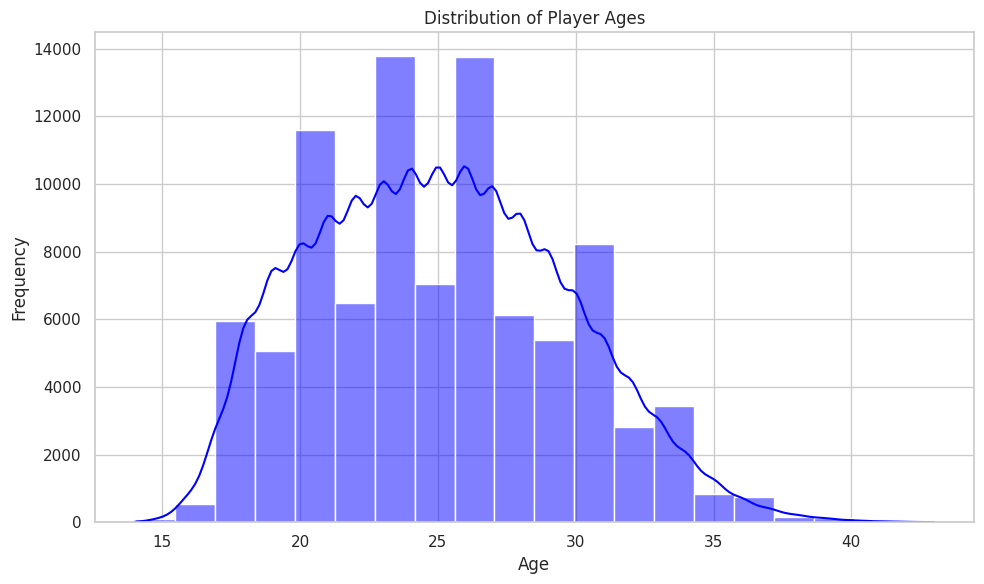

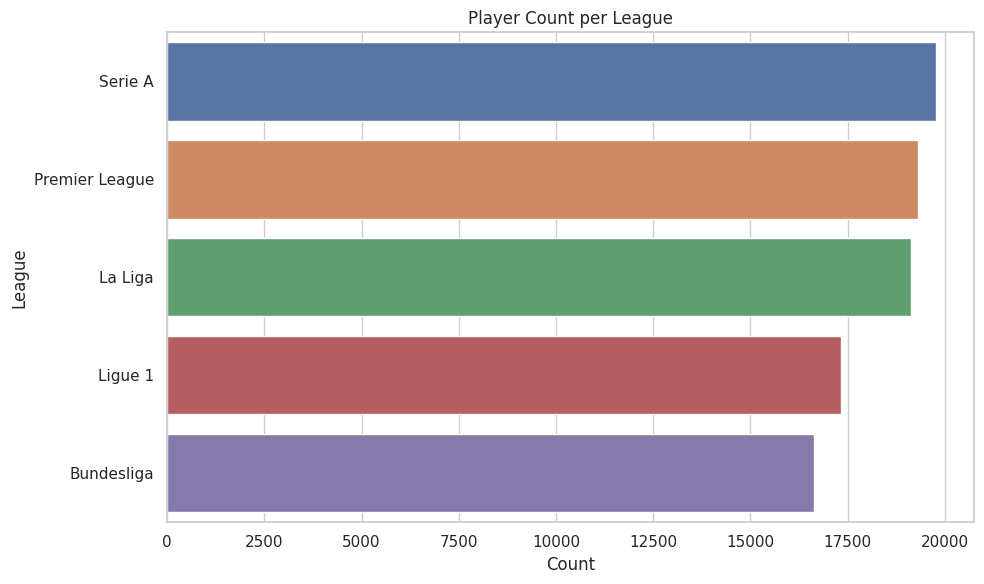

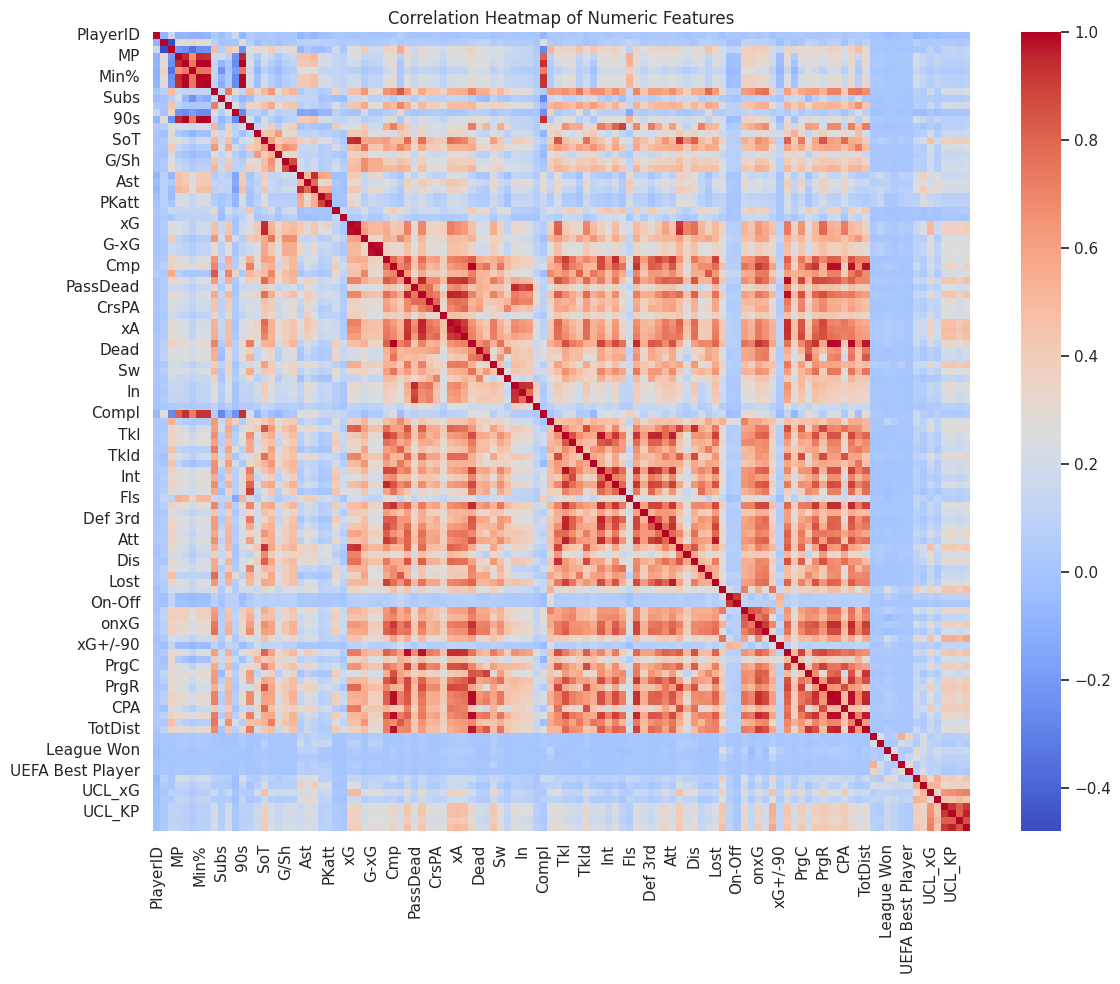

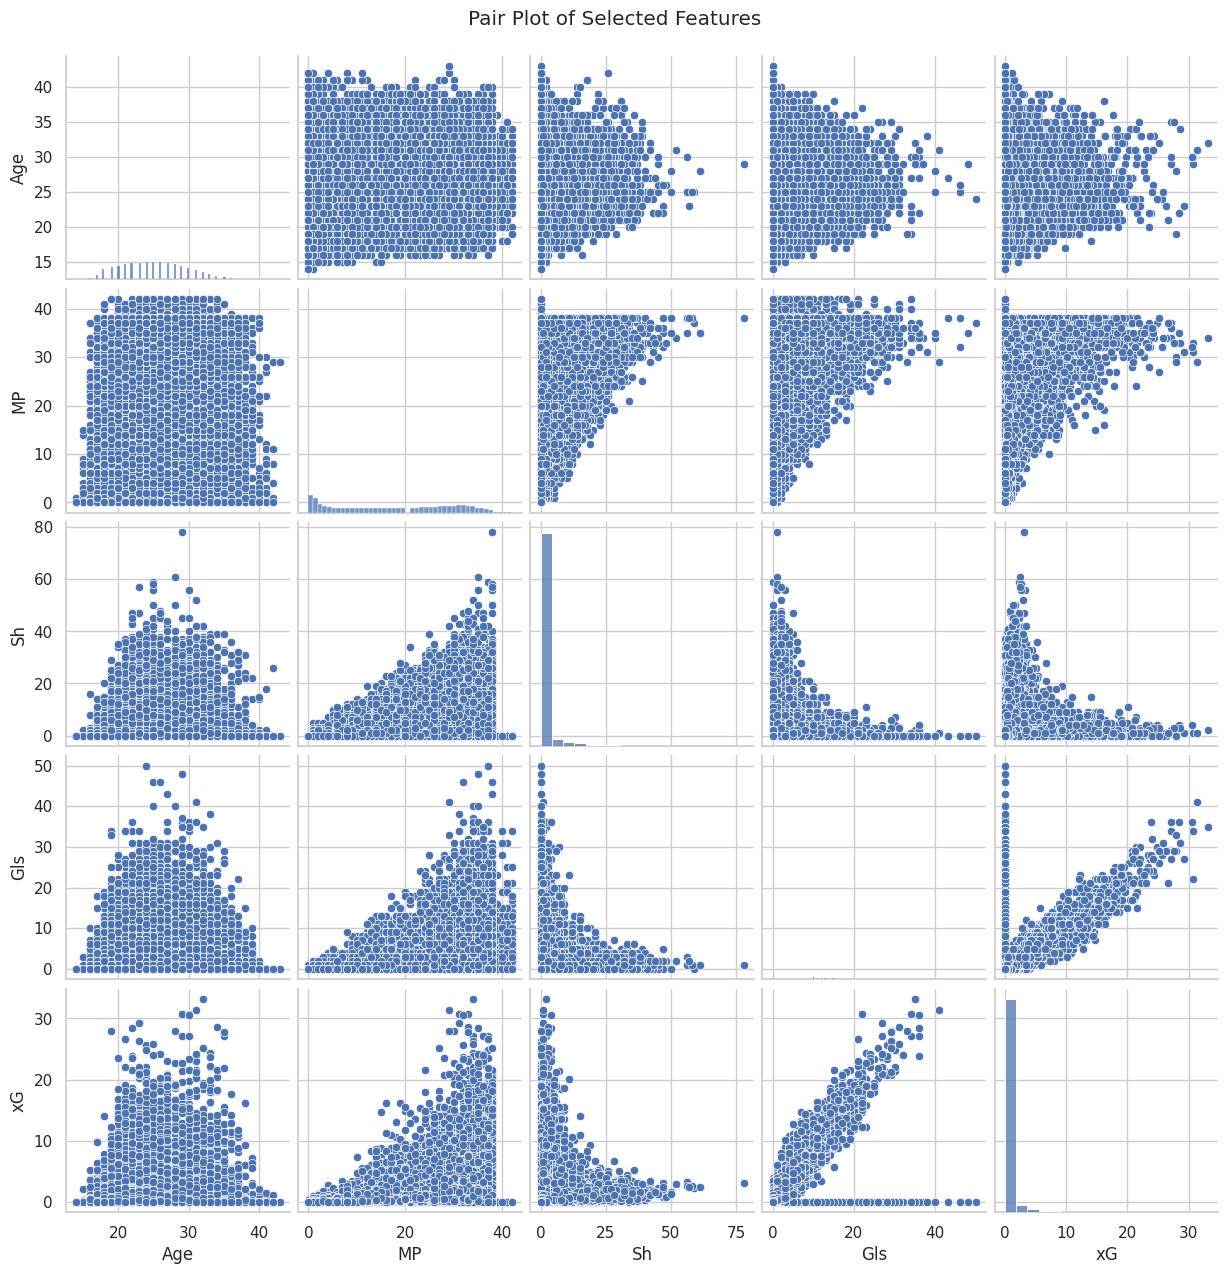

In [4]:
# A few visualizations to get a feel for the data

# Histogram of player ages
plt.figure(figsize=(10, 6))
sns.histplot(df_all['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Pie chart (using countplot) for number of players per League
plt.figure(figsize=(10, 6))
sns.countplot(y='League', data=df_all, order=df_all['League'].value_counts().index)
plt.title('Player Count per League')
plt.xlabel('Count')
plt.ylabel('League')
plt.tight_layout()
plt.show()

# Correlation Heatmap on numeric columns if there are at least 4 numeric features
numeric_df = df_all.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

# Pair Plot for a subset of relevant numeric features
selected_cols = ['Age', 'MP', 'Sh', 'Gls', 'xG']
sns.pairplot(df_all[selected_cols].dropna())
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

## Feature Engineering and Prediction Model

R2 Score for the goal prediction model: 0.3453278882848152


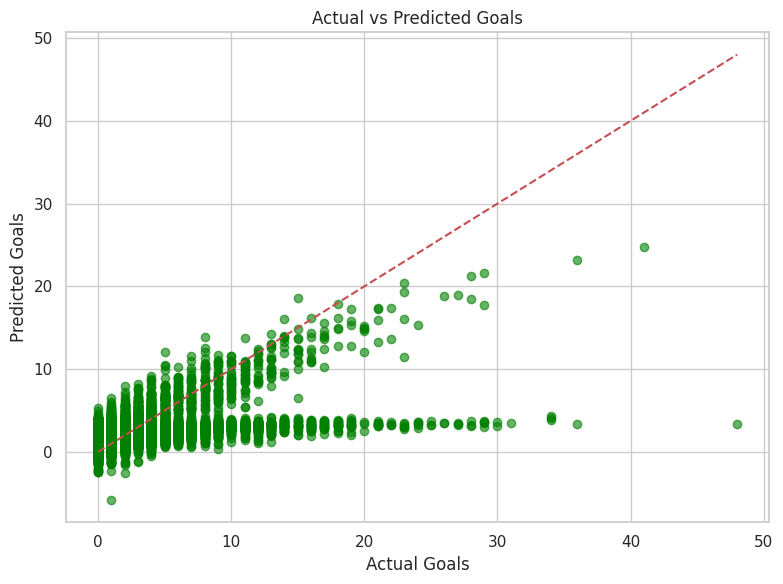

In [5]:
# For our prediction model, we'll attempt to predict the number of goals (Gls) of players based on selected features.
# We'll use features that might influence goal scoring: Age, Minutes Played (MP), Shots (Sh), and Expected Goals (xG).
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select features and target from the All Players dataset
features = ['Age', 'MP', 'Sh', 'xG']
target = 'Gls'

# Drop rows with missing values in our selected features and target (if any)
df_model = df_all[features + [target]].dropna()

# Splitting data into training and testing sets
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set and evaluate performance
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print('R2 Score for the goal prediction model:', score)

# Optional: Plot the actual vs predicted goals
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('Actual vs Predicted Goals')
plt.tight_layout()
plt.show()

## Summary and Future Steps

In this notebook we explored a rich dataset of football players spanning over three decades. We started by loading and cleaning the data, performed exploratory data analysis using multiple visualization techniques, and built a simple predictive model to forecast a player's goal tally. Our approach employed linear regression using select features which rendered a baseline performance as indicated by the R2 score.

While the current model offers an initial insight into the factors affecting goal scoring, further work might include:

- Enhancing feature engineering by including additional performance metrics and categorical encodings for positions and leagues.
- Experimenting with more sophisticated models such as decision trees or ensemble methods.
- Incorporating time-series analysis techniques given the temporal nature of the 'Season' feature.
- Evaluating model assumptions and checking for multicollinearity among features.

Future improvements may also include more detailed error analysis and cross-validation to achieve a robust understanding of player performance predictions. If you appreciated this investigation, please consider upvoting the notebook.